## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df_clean = application_df.drop(columns = ['EIN','NAME'], axis=1)
application_df_clean

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Split the Range column into two columns
application_df_clean[['min_val_income', 'max_val_income']] = application_df_clean['INCOME_AMT'].str.split('-', expand=True)

# Define a function to convert the values to integers
def convert_to_numeric(value):
    if value is None:
        return 0  # Handle None values
    elif '+' in value:
        value = value.replace('+', '')  # Remove the '+' symbol
    if 'M' in value:
        return int(float(value.replace('M', '')) * 1000000)
    elif 'K' in value:
        return int(float(value.replace('K', '')) * 1000)
    elif value.isdigit():
        return int(value)
    else:
        return 0

# Convert the values in the min_val and max_val columns to integers
application_df_clean['min_val_income'] = application_df_clean['min_val_income'].apply(convert_to_numeric)
application_df_clean['max_val_income'] = application_df_clean['max_val_income'].apply(convert_to_numeric)

# Drop the original column 
application_df_clean.drop(columns=['INCOME_AMT'], inplace=True)

application_df_clean

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,min_val_income,max_val_income
0,T10,Independent,C1000,ProductDev,Association,1,N,5000,1,0,0
1,T3,Independent,C2000,Preservation,Co-operative,1,N,108590,1,1,9999
2,T5,CompanySponsored,C3000,ProductDev,Association,1,N,5000,0,0,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,N,6692,1,10000,24999
4,T3,Independent,C1000,Heathcare,Trust,1,N,142590,1,100000,499999
...,...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,N,5000,0,0,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,N,5000,0,0,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,N,5000,0,0,0
34297,T5,Independent,C3000,ProductDev,Association,1,N,5000,1,0,0


In [4]:
application_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   SPECIAL_CONSIDERATIONS  34299 non-null  object
 7   ASK_AMT                 34299 non-null  int64 
 8   IS_SUCCESSFUL           34299 non-null  int64 
 9   min_val_income          34299 non-null  int64 
 10  max_val_income          34299 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 2.9+ MB


In [5]:
# Determine the number of unique values in each column.
application_df_clean.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
min_val_income               9
max_val_income               8
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
application_count = application_df_clean['APPLICATION_TYPE'].value_counts()
application_count

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace
application_types_to_replace = list(application_count[application_count<500].index)
application_types_to_replace


# # Replace in dataframe
for app in application_types_to_replace:
    application_df_clean['APPLICATION_TYPE'] = application_df_clean['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df_clean['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df_clean['CLASSIFICATION'].value_counts()
classification_count

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_count_h1 =classification_count[classification_count>1]
classification_count_h1[:10]

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
Name: count, dtype: int64

In [10]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_count[classification_count<1000].index)
classifications_to_replace

# Replace in dataframe
for cls in classifications_to_replace:
    application_df_clean['CLASSIFICATION'] = application_df_clean['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df_clean['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [11]:
# Check
application_df_clean.nunique()

APPLICATION_TYPE             9
AFFILIATION                  6
CLASSIFICATION               6
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
min_val_income               9
max_val_income               8
dtype: int64

In [12]:
# Adding a new column to df by calculating the mean along the columns
application_df_clean['mean_income'] = application_df_clean[['min_val_income', 'max_val_income']].mean(axis=1)

In [20]:
application_df_clean2 = application_df_clean
application_df_clean2


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,min_val_income,max_val_income,mean_income
0,T10,Independent,C1000,ProductDev,Association,1,N,5000,1,0,0,0.0
1,T3,Independent,C2000,Preservation,Co-operative,1,N,108590,1,1,9999,5000.0
2,T5,CompanySponsored,C3000,ProductDev,Association,1,N,5000,0,0,0,0.0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,N,6692,1,10000,24999,17499.5
4,T3,Independent,C1000,Heathcare,Trust,1,N,142590,1,100000,499999,299999.5
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,N,5000,0,0,0,0.0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,N,5000,0,0,0,0.0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,N,5000,0,0,0,0.0
34297,T5,Independent,C3000,ProductDev,Association,1,N,5000,1,0,0,0.0


In [22]:
# Dropping more columns
application_df_clean2 = application_df_clean2.drop(['min_val_income', 'max_val_income','STATUS','SPECIAL_CONSIDERATIONS'], axis=1)
application_df_clean2

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,ASK_AMT,IS_SUCCESSFUL,mean_income
0,T10,Independent,C1000,ProductDev,Association,5000,1,0.0
1,T3,Independent,C2000,Preservation,Co-operative,108590,1,5000.0
2,T5,CompanySponsored,C3000,ProductDev,Association,5000,0,0.0
3,T3,CompanySponsored,C2000,Preservation,Trust,6692,1,17499.5
4,T3,Independent,C1000,Heathcare,Trust,142590,1,299999.5
...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,5000,0,0.0
34295,T4,CompanySponsored,C3000,ProductDev,Association,5000,0,0.0
34296,T3,CompanySponsored,C2000,Preservation,Association,5000,0,0.0
34297,T5,Independent,C3000,ProductDev,Association,5000,1,0.0


In [24]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_model = pd.get_dummies(application_df_clean2)
application_df_model[:10]

,ASK_AMT,IS_SUCCESSFUL,mean_income,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,5000,1,0.0,False,True,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
1,108590,1,5000.0,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,True,False,False
2,5000,0,0.0,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,False,False,False
3,6692,1,17499.5,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,142590,1,299999.5,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
5,5000,1,0.0,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
6,31452,1,299999.5,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
7,7508025,1,30000000.0,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
8,94389,1,5000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
9,5000,0,0.0,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,False,False,False


In [19]:
application_df_clean2['SPECIAL_CONSIDERATIONS'].value_counts()

SPECIAL_CONSIDERATIONS
N    34272
Y       27
Name: count, dtype: int64

In [45]:
# Split our preprocessed data into our features and target arrays
X = application_df_model.drop('IS_SUCCESSFUL',axis =1)
y =application_df_model['IS_SUCCESSFUL']

In [26]:
# checking the balance between labels target
y.value_counts()

IS_SUCCESSFUL
1    18261
0    16038
Name: count, dtype: int64

In [46]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X)

# Scale the data
X_scaled = pd.DataFrame(X_scaler.transform(X),columns=X.columns)

X_scaled


,ASK_AMT,mean_income,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,-0.031725,-0.155840,-0.090068,7.997514,-0.179013,-1.929528,-0.216965,-0.188176,-0.191719,-0.146949,...,-0.265655,-0.106407,-0.065383,-0.009353,-2.128034,2.246807,1.531213,-0.119888,-0.03543,-1.476667
1,-0.030536,-0.154189,-0.090068,-0.125039,-0.179013,0.518261,-0.216965,-0.188176,-0.191719,-0.146949,...,-0.265655,-0.106407,-0.065383,-0.009353,0.469917,-0.445076,-0.653077,8.341107,-0.03543,-1.476667
2,-0.031725,-0.155840,-0.090068,-0.125039,-0.179013,-1.929528,-0.216965,5.314171,-0.191719,-0.146949,...,-0.265655,-0.106407,-0.065383,-0.009353,-2.128034,2.246807,1.531213,-0.119888,-0.03543,-1.476667
3,-0.031706,-0.150061,-0.090068,-0.125039,-0.179013,0.518261,-0.216965,-0.188176,-0.191719,-0.146949,...,-0.265655,-0.106407,-0.065383,-0.009353,0.469917,-0.445076,-0.653077,-0.119888,-0.03543,0.677201
4,-0.030146,-0.056776,-0.090068,-0.125039,-0.179013,0.518261,-0.216965,-0.188176,-0.191719,-0.146949,...,-0.265655,-0.106407,15.294596,-0.009353,-2.128034,-0.445076,-0.653077,-0.119888,-0.03543,0.677201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,-0.031725,-0.155840,-0.090068,-0.125039,-0.179013,-1.929528,4.609034,-0.188176,-0.191719,-0.146949,...,-0.265655,-0.106407,-0.065383,-0.009353,-2.128034,2.246807,1.531213,-0.119888,-0.03543,-1.476667
34295,-0.031725,-0.155840,-0.090068,-0.125039,-0.179013,-1.929528,4.609034,-0.188176,-0.191719,-0.146949,...,-0.265655,-0.106407,-0.065383,-0.009353,-2.128034,2.246807,1.531213,-0.119888,-0.03543,-1.476667
34296,-0.031725,-0.155840,-0.090068,-0.125039,-0.179013,0.518261,-0.216965,-0.188176,-0.191719,-0.146949,...,-0.265655,-0.106407,-0.065383,-0.009353,0.469917,-0.445076,1.531213,-0.119888,-0.03543,-1.476667
34297,-0.031725,-0.155840,-0.090068,-0.125039,-0.179013,-1.929528,-0.216965,5.314171,-0.191719,-0.146949,...,-0.265655,-0.106407,-0.065383,-0.009353,-2.128034,2.246807,1.531213,-0.119888,-0.03543,-1.476667


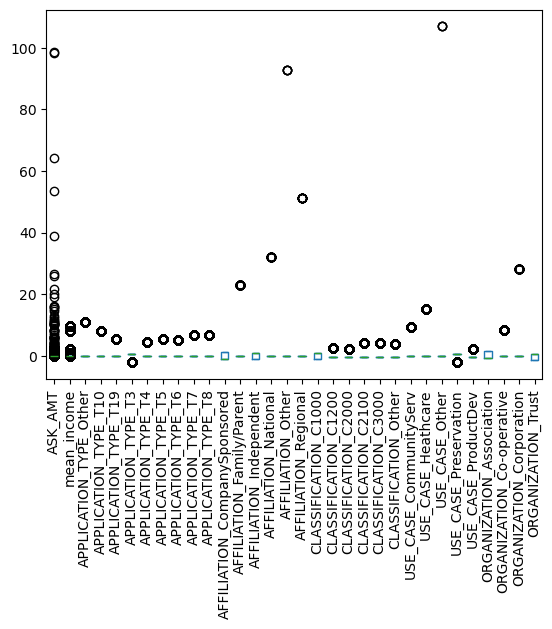

In [47]:
# outlier plot
X_scaled.plot(kind='box', showfliers=True, rot=90)
plt.show()

In [48]:
# Define threshold for outliers (e.g., values greater than 10)
threshold = 3

# Create boolean mask for outliers
outlier_mask = abs(X_scaled) > threshold

# Count the number of outliers along each column (axis=0)
outlier_counts = outlier_mask.sum(axis=0)

print("Number of outliers in each column:")
print(outlier_counts)

Number of outliers in each column:
ASK_AMT                           53
mean_income                      379
APPLICATION_TYPE_Other           276
APPLICATION_TYPE_T10             528
APPLICATION_TYPE_T19            1065
APPLICATION_TYPE_T3                0
APPLICATION_TYPE_T4             1542
APPLICATION_TYPE_T5             1173
APPLICATION_TYPE_T6             1216
APPLICATION_TYPE_T7              725
APPLICATION_TYPE_T8              737
AFFILIATION_CompanySponsored       0
AFFILIATION_Family/Parent         64
AFFILIATION_Independent            0
AFFILIATION_National              33
AFFILIATION_Other                  4
AFFILIATION_Regional              13
CLASSIFICATION_C1000               0
CLASSIFICATION_C1200               0
CLASSIFICATION_C2000               0
CLASSIFICATION_C2100            1883
CLASSIFICATION_C3000            1918
CLASSIFICATION_Other            2261
USE_CASE_CommunityServ           384
USE_CASE_Heathcare               146
USE_CASE_Other                     3
USE

In [49]:
# Filter out rows containing outliers
mask = X_scaled[abs((X_scaled))> threshold].any(axis=1)
X_scaled_clean= X_scaled[~mask]
y_clean = y[~mask]

print(X_scaled_clean.shape)
print(y_clean.shape)

(21972, 32)
(21972,)


In [32]:
# number of row eliminated in the original dataset
len(X_scaled) - len(X_scaled_clean)

12327

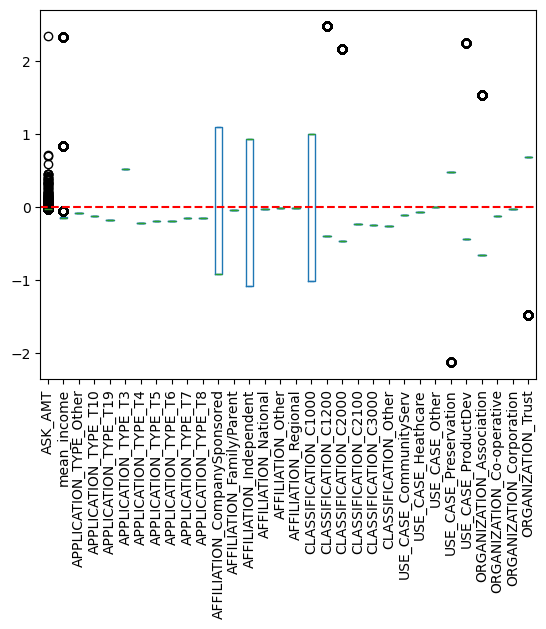

In [33]:
# plot of outliers
plot_x = X_scaled_clean.plot(kind='box', showfliers=True, rot=90)
plot_x.axhline(y=0, color='r', linestyle='--')
plt.show()

In [34]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=15)

In [35]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
X_pca = pca_model.fit_transform(X_scaled_clean)


# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance_ratio = pca_model.explained_variance_ratio_

# Round each value in the array
rounded_variance_ratio = [round(variance, 3) for variance in explained_variance_ratio]

# Print the rounded variance ratios
print(rounded_variance_ratio)
print(f"The total explained variance: {round(sum(pca_model.explained_variance_ratio_),3)}")

[0.401, 0.23, 0.222, 0.128, 0.01, 0.009, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
The total explained variance: 1.0


In [36]:
X_pca2 = X_pca[:,0:7]
X_pca2.shape

(21972, 7)

In [51]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test,y_train,y_test = train_test_split(X_pca2,y_clean,random_state =42)
print(X_train.shape)
print(y_train.shape)

(16479, 7)
(16479,)


## Optimization of the Model

In [52]:
num_features = X_train.shape[1]

# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid','linear'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=num_features,
        step=5), activation=activation, input_dim=num_features))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model


In [43]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=10,
    hyperband_iterations=2)

c:\Users\nigro\anaconda3\envs\mnpy39\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train,y_train,epochs = 10,validation_data=(X_test,y_test))

Trial 56 Complete [00h 00m 14s]
val_accuracy: 0.7032586932182312

Best val_accuracy So Far: 0.70526123046875
Total elapsed time: 00h 09m 43s


In [55]:
top_hyper = tuner.get_best_hyperparameters(3)
for param in top_hyper:
    print(param.values)

{'activation': 'relu', 'first_units': 1, 'num_layers': 2, 'units_0': 6, 'units_1': 16, 'units_2': 1, 'units_3': 1, 'units_4': 6, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0039'}
{'activation': 'tanh', 'first_units': 6, 'num_layers': 3, 'units_0': 6, 'units_1': 1, 'units_2': 11, 'units_3': 6, 'units_4': 11, 'tuner/epochs': 10, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
{'activation': 'relu', 'first_units': 6, 'num_layers': 3, 'units_0': 21, 'units_1': 21, 'units_2': 21, 'units_3': 6, 'units_4': 11, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0017'}


In [56]:
top_model = tuner.get_best_models(1)[0]


c:\Users\nigro\anaconda3\envs\mnpy39\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\nigro\anaconda3\envs\mnpy39\lib\site-packages\keras_tuner\src\tuners\hyperband.py:435: UserWarning: Model 'sequential' had a build config, but the model cannot be built automatically in `build_from_config(config)`. You should implement `def build_from_config(self, config)`, and you might also want to implement the method  that generates the config at saving time, `def get_build_config(self)`. The method `build_from_config()` is meant to create the state of the model (i.e. its variables) upon deserialization.
  model.build_from_config(
c:\Users\nigro\anaconda3\envs\mnpy39\lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: 

In [57]:
# Get the list of layers in the model
layers = top_model.layers

# Iterate over each layer and print its activation function
for layer in layers:
    if hasattr(layer, 'units'):
        print("Number of Units:", layer.units)
    print("Layer Name:", layer.name)
    print("Activation Function:", layer.activation.__name__)

Number of Units: 1
Layer Name: dense
Activation Function: relu
Number of Units: 6
Layer Name: dense_1
Activation Function: relu
Number of Units: 16
Layer Name: dense_2
Activation Function: relu
Number of Units: 1
Layer Name: dense_3
Activation Function: sigmoid


In [58]:
model_loss, model_accuracy = top_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

172/172 - 0s - 2ms/step - accuracy: 0.7031 - loss: 0.6071
Loss: 0.6070929765701294, Accuracy: 0.7030766606330872


In [60]:
model_loss, model_accuracy = top_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

172/172 - 0s - 1ms/step - accuracy: 0.7031 - loss: 0.6071
Loss: 0.6070929765701294, Accuracy: 0.7030766606330872


In [61]:
# Export our model to HDF5 file
top_model.save('AlphabetSoupCharity_Optimization2.h5')